#  Neural Network Classification with TensorFlow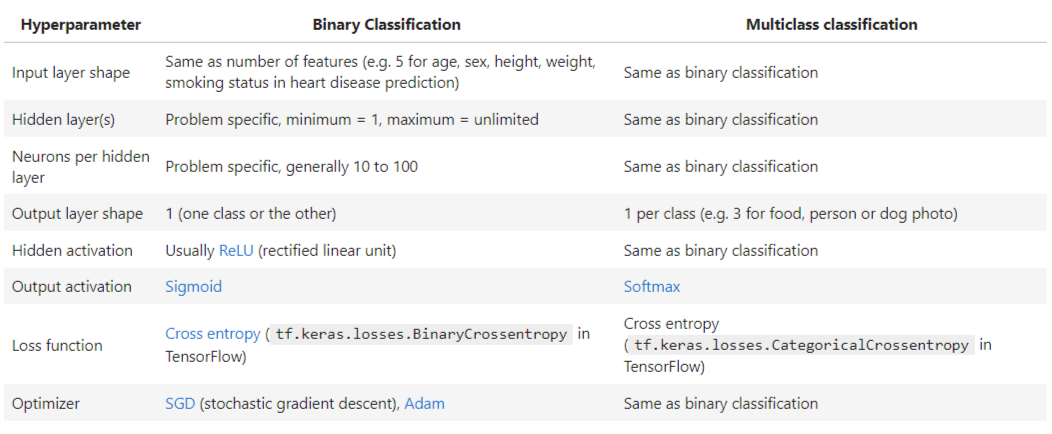

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
import pandas as pd

circle = pd.DataFrame({'X1':x[:, 0], 'X2':x[:, 1], 'label':y})
circle

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circle.label.value_counts()

1    500
0    500
Name: label, dtype: int64

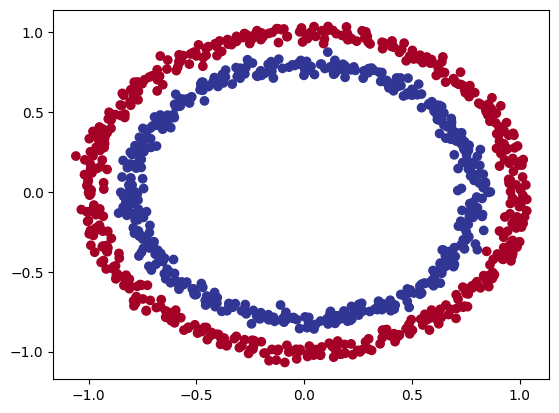

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0],
            x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

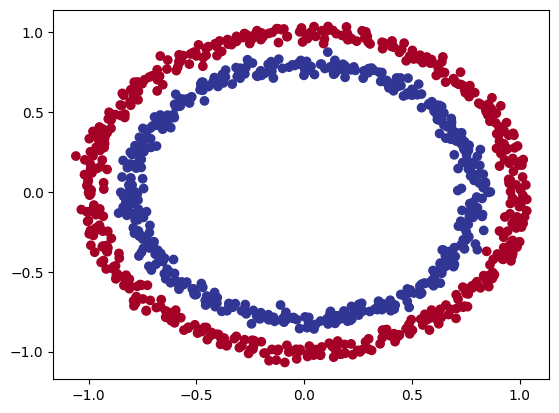

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0],
            x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.show()

In [9]:
x.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(x), len(y)

(1000, 1000)

In [11]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. **Creating a model** - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [12]:
# set random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

# fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.2641 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.4584 - accuracy: 0.4690
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8130 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7627 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.4950


In [13]:
model.fit(x, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5040
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5040
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4720
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4780
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4730
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5160
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4940
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4840
Epoch 11/

In [14]:
model.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [15]:
# random seed
tf.random.set_seed(42)

# create the model with extra layers
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))
model_1.add(tf.keras.layers.Dense(1))

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# fit the model
model_1.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.1804 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.4980
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.5030
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.4980
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4990
Epoch 11/

In [16]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932553052902222, 0.5]

## Improving a model

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

In [17]:
# random seed
tf.random.set_seed(42)

# create the model with more layers and more hidden units
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100))
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_2.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.0222 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5090
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5020
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4600
Epoch 11/

In [18]:
import numpy as np

def plot_decision_boundry(model, x, y):
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in =  np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)


  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


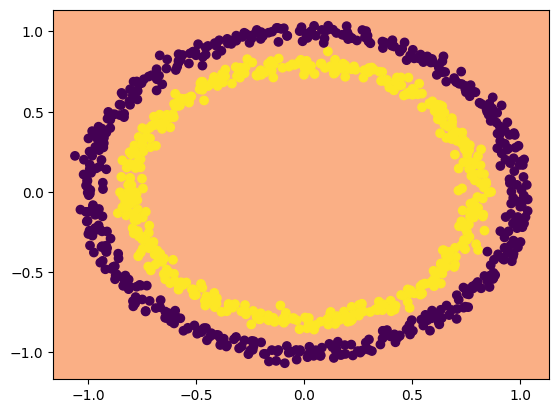

In [19]:
plot_decision_boundry(model_1, x=x, y=y)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


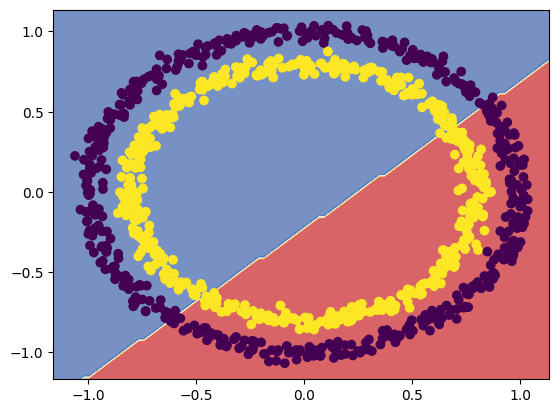

In [20]:
plot_decision_boundry(model_2, x=x, y=y)

In [21]:
# random seed
tf.random.set_seed(42)

# create the model withe activation function
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(1, activation='relu'))
model_3.add(tf.keras.layers.Dense(1))

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_3.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.7787 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3968 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2958 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2258 - accuracy: 0.4380
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1699 - accuracy: 0.4130
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1251 - accuracy: 0.4200
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0882 - accuracy: 0.4470
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0571 - accuracy: 0.4590
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0293 - accuracy: 0.4590
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0027 - accuracy: 0.4580
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


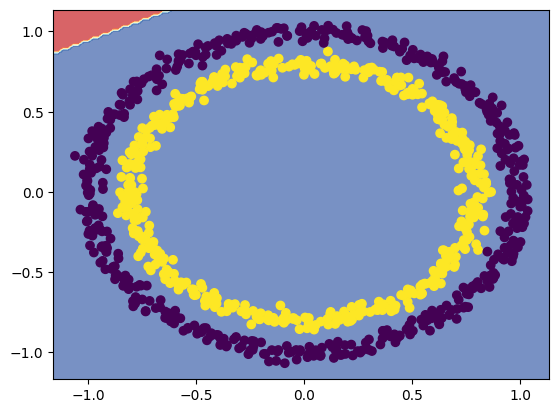

In [22]:
plot_decision_boundry(model_3, x, y)

In [23]:
# random seed
tf.random.set_seed(42)

# create the model with output activation function
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(4, activation='relu'))
model_4.add(tf.keras.layers.Dense(4, activation='relu'))
model_4.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# fit the model
model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7044 - accuracy: 0.4640
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5300
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.5340
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5610
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.5480
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.6850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.6740
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.7200
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7570
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


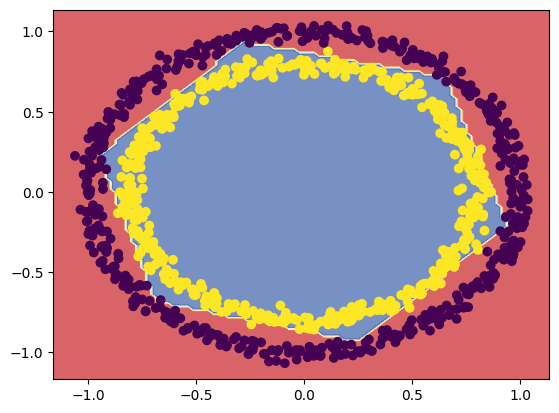

In [24]:
plot_decision_boundry(model_4, x, y)

In [25]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

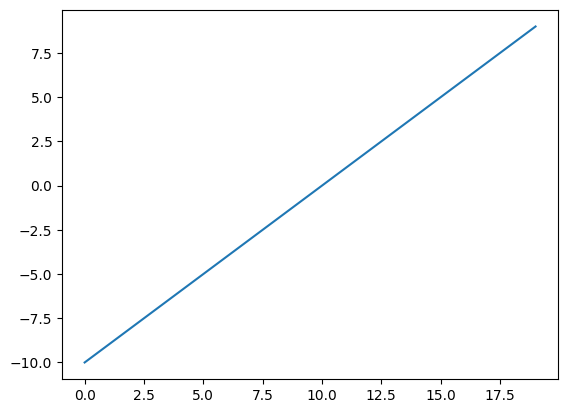

In [26]:
plt.plot(A)

In [27]:
def sigmoid(x):
  return 1/ (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

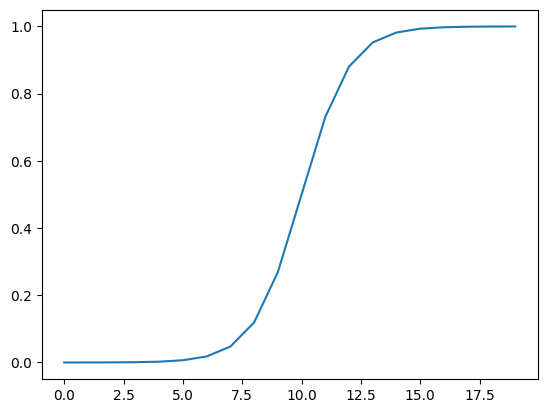

In [28]:
plt.plot(sigmoid(A))

In [29]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

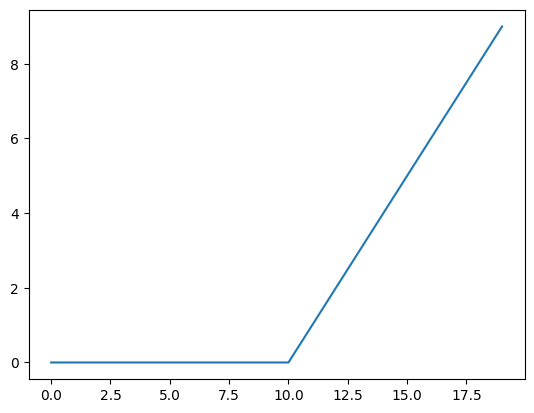

In [30]:
plt.plot(relu(A))

## Evaluating and improving our classification model

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [32]:
x_train.shape

(800, 2)

In [33]:
# random seed
tf.random.set_seed(42)

# create the model
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(4, activation='relu'))
model_5.add(tf.keras.layers.Dense(4, activation='relu'))
model_5.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# fit the model
history = model_5.fit(x_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7069 - accuracy: 0.4775
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4737
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5038
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5163
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5300
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5688
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.5537
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.5850
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6050
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


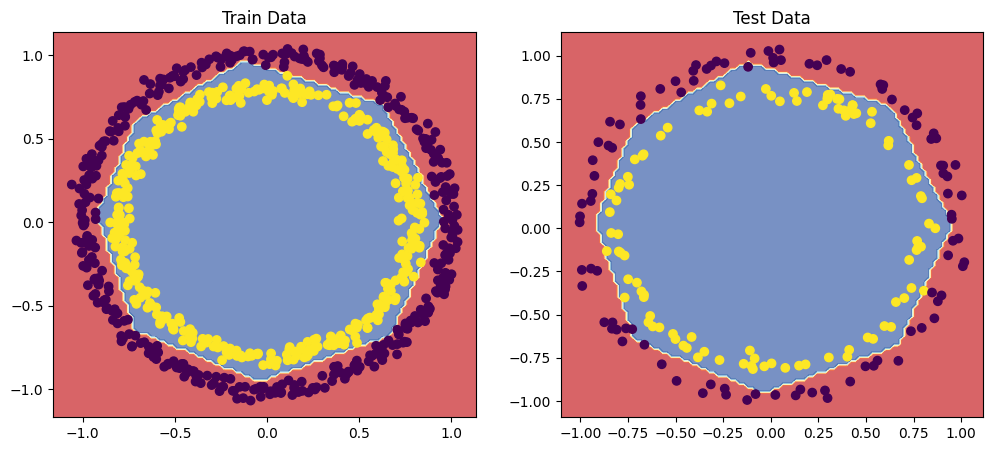

In [34]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundry(model_5, x_train, y_train)
plt.title('Train Data')
plt.subplot(1, 2, 2)
plot_decision_boundry(model_5, x_test, y_test)
plt.title('Test Data')
plt.show()

## Plot the loss curves

In [35]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy
0,0.706924,0.47750
1,0.694776,0.47375
2,0.690755,0.50375
3,0.688909,0.50375
4,0.685584,0.51625
...,...,...
95,0.010442,0.99750
96,0.010957,0.99625
97,0.010185,0.99875
98,0.011724,0.99750


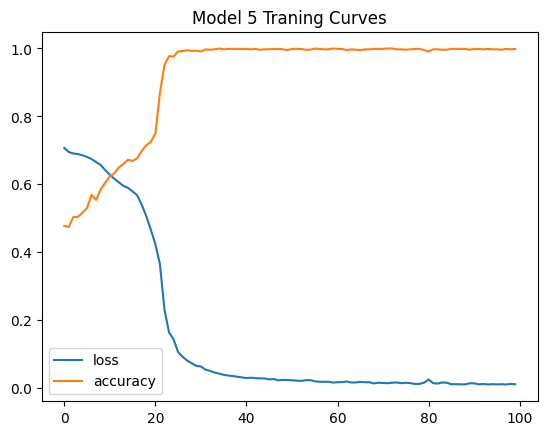

In [36]:
pd.DataFrame(history.history).plot()
plt.title('Model 5 Traning Curves')
plt.show()

## Finding the best learning rate

In [37]:
# random seed
tf.random.set_seed(42)

# create the model
model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(4, activation='relu'))
model_6.add(tf.keras.layers.Dense(4, activation='relu'))
model_6.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# lr_rate
lr_rate = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# fit the model
history = model_6.fit(x_train,
            y_train,
            epochs=100,
            callbacks=[lr_rate])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5100 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [38]:
y_pred_1 = model_6.predict(x_test)
y_pred_1

7/7 [==============================] - 0s 3ms/step


array([[0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],
       [0.8187755],


<Axes: >

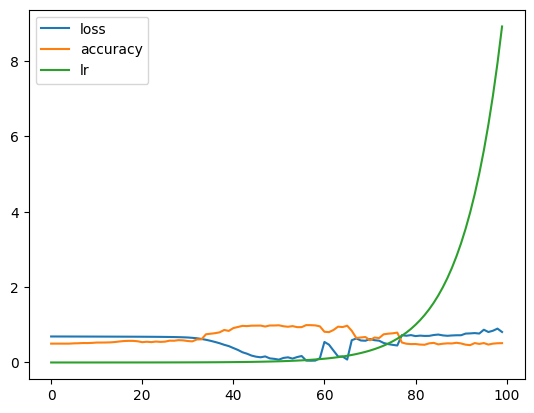

In [39]:
pd.DataFrame(history.history).plot()

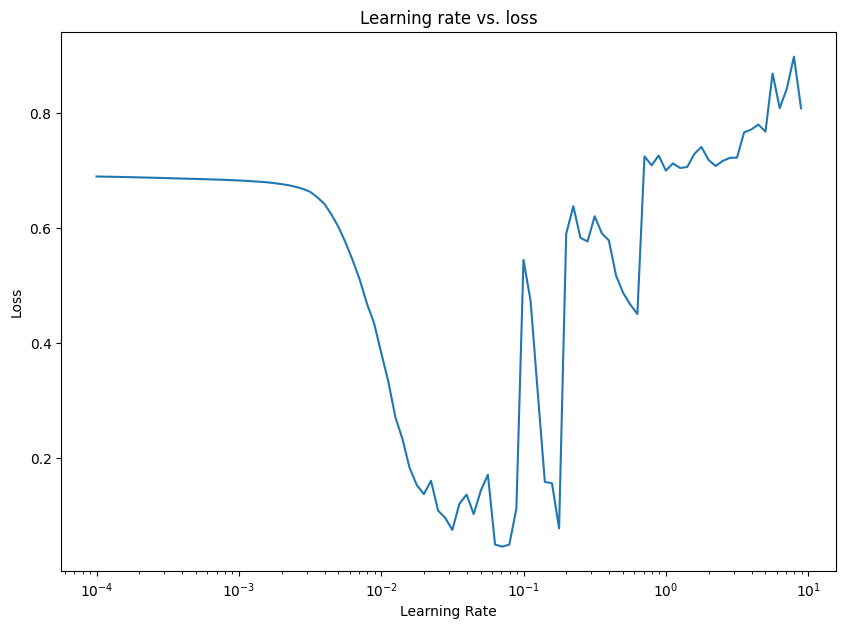

In [40]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [41]:
# random seed
tf.random.set_seed(42)

# create the model
model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Dense(4, activation='relu'))
model_7.add(tf.keras.layers.Dense(4, activation='relu'))
model_7.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# fit the model
history = model_7.fit(x_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6825 - accuracy: 0.6012
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.5775
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6263
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.6762
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.7000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8138
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.9125
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.9650
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.9688
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9812
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


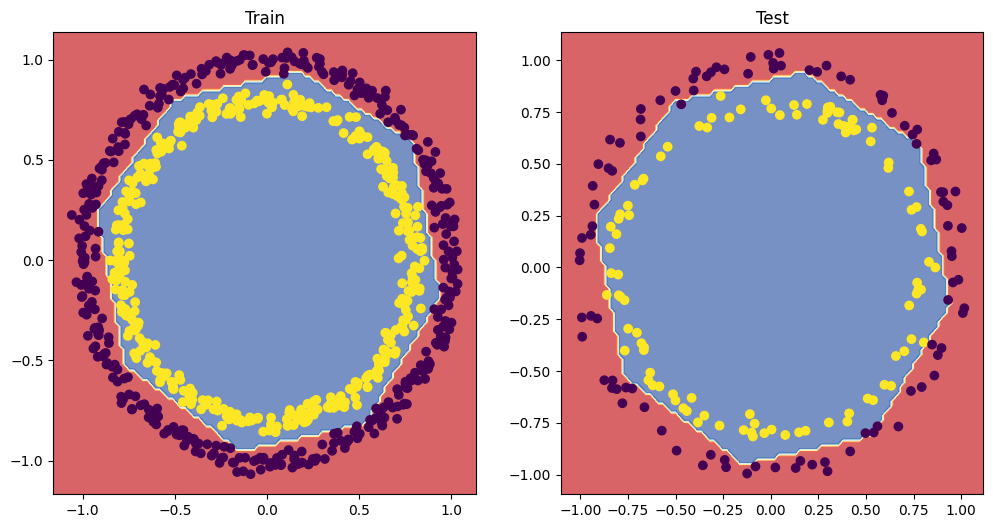

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundry(model_7, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundry(model_7, x=x_test, y=y_test)
plt.show()

## More classification evaluation methods

In [43]:
loss, accuracy = model_7.evaluate(x_test, y_test)
print(f'model loss on test set is: {loss}')
print(f'model accuracy on test set is: {accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9750
model loss on test set is: 0.05250154063105583
model accuracy on test set is: 0.9750000238418579


In [44]:
from sklearn.metrics import confusion_matrix

y_pred = model_7.predict(x_test)
y_pred

7/7 [==============================] - 0s 2ms/step


array([[9.9854827e-01],
       [4.2153881e-03],
       [9.9854827e-01],
       [1.7792175e-06],
       [9.9854827e-01],
       [9.9839318e-01],
       [1.8755883e-03],
       [1.1891439e-06],
       [9.9854827e-01],
       [2.2182874e-03],
       [9.1513336e-01],
       [9.9854827e-01],
       [9.0174689e-07],
       [9.9854827e-01],
       [2.2377621e-04],
       [9.9854827e-01],
       [9.9854827e-01],
       [5.6613709e-07],
       [9.9854827e-01],
       [4.1172727e-05],
       [1.9274086e-04],
       [1.1446074e-05],
       [9.9854827e-01],
       [1.0722768e-11],
       [1.0353759e-04],
       [1.8286130e-03],
       [1.3305501e-04],
       [5.2646481e-08],
       [8.1283005e-08],
       [9.9854827e-01],
       [9.9854827e-01],
       [1.6303619e-06],
       [2.9265217e-02],
       [9.9854827e-01],
       [4.0055537e-03],
       [9.9854827e-01],
       [9.4059902e-01],
       [9.9854827e-01],
       [9.9854827e-01],
       [9.9854827e-01],
       [9.9854827e-01],
       [9.942831

In [45]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1])

In [46]:
confusion_matrix(y_test, tf.round(y_pred))

array([[96,  4],
       [ 1, 99]])

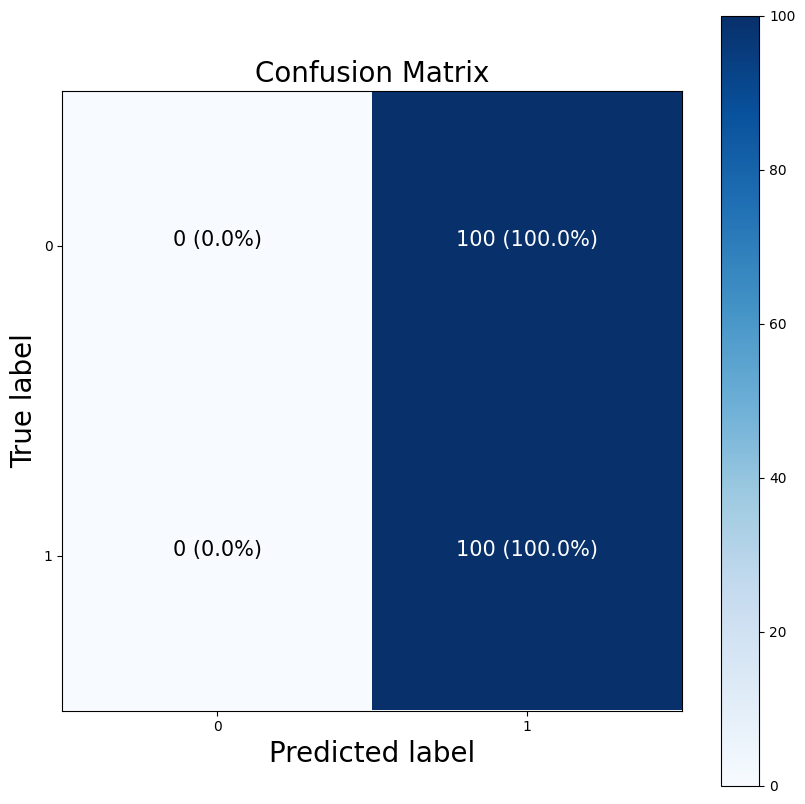

In [47]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred_1))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


In [48]:
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


# Working with a larger example (multiclass classification)

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [50]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [51]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_label[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [52]:
train_data.shape

(60000, 28, 28)

In [53]:
train_data[0].shape

(28, 28)

In [54]:
train_label.shape

(60000,)

In [55]:
train_label[0].shape

()

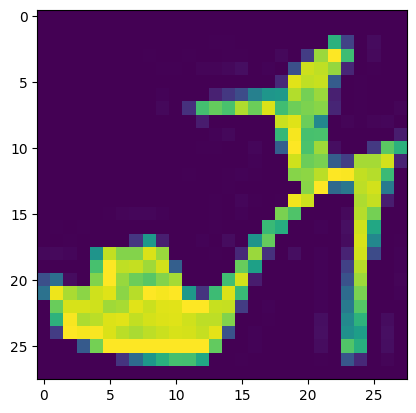

In [56]:
import matplotlib.pyplot as plt
plt.imshow(train_data[9])

In [57]:
train_label[9]

5

In [58]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

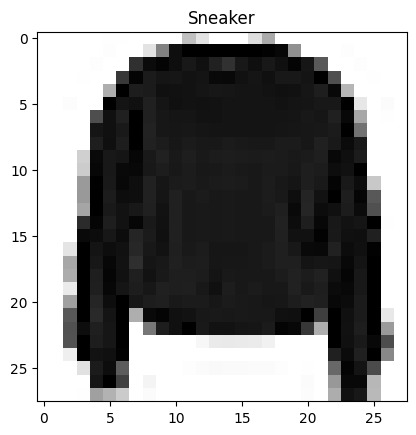

In [59]:
plt.imshow(train_data[7], cmap=plt.cm.binary)
plt.title(class_names[7])

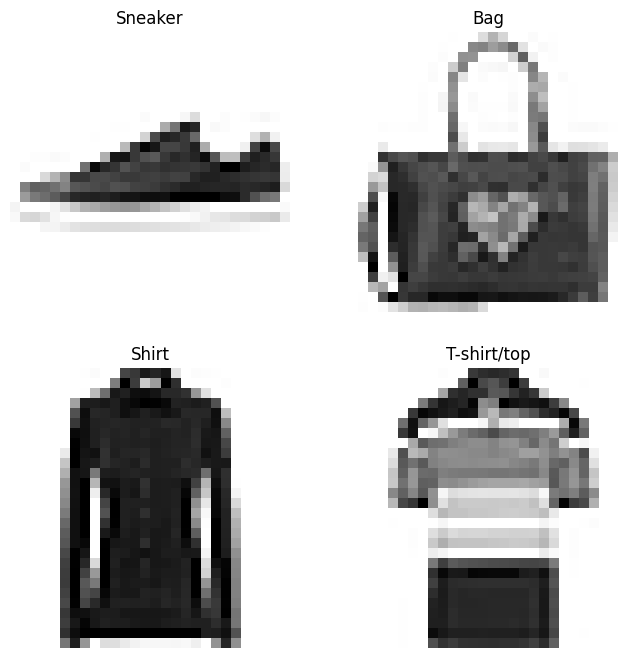

In [60]:
import random
plt.figure(figsize=(8, 8))
for i in  range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_label[rand_index]])
  plt.axis(False)

In [61]:
# set random seed
tf.random.set_seed(42)

# create the model
model_8 = tf.keras.Sequential()
model_8.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_8.add(tf.keras.layers.Dense(4, activation='relu'))
model_8.add(tf.keras.layers.Dense(4, activation='relu'))
model_8.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
non_norm_history = model_8.fit(train_data,
                               train_label,
                               epochs=10,
                               validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.4493 - accuracy: 0.0988 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3044 - val_accuracy: 0.1001
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2980 - accuracy: 0.1010 - val_loss: 2.2892 - val_accuracy: 0.1058
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2857 - accuracy: 0.1079 - val_loss: 2.2791 - val_accuracy: 0.1110
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0455 - accuracy: 0.1718 - val_loss: 1.8343 - val_accuracy: 0.1994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7756 - accuracy: 0.2307 - val_loss: 1.7073 - val_accuracy:

In [62]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
train_data.min(), train_data.max()

(0, 255)

In [64]:
train_data = train_data / 255.
test_data = test_data / 255.

In [65]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [66]:
# set random seed
tf.random.set_seed(42)

# create the model with norm data
model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_9.add(tf.keras.layers.Dense(4, activation='relu'))
model_9.add(tf.keras.layers.Dense(4, activation='relu'))
model_9.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
norm_history = model_9.fit(train_data,
                           train_label,
                           epochs=10,
                           validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1631 - accuracy: 0.5645 - val_loss: 0.8800 - val_accuracy: 0.6803
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7666 - accuracy: 0.7452 - val_loss: 0.7469 - val_accuracy: 0.7556
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6537 - accuracy: 0.7809 - val_loss: 0.6435 - val_accuracy: 0.7841
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5743 - accuracy: 0.8046 - val_loss: 0.6002 - val_accuracy: 0.7996
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5510 - accuracy: 0.8110 - val_loss: 0.5995 - val_accuracy: 0.7940
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5367 - accuracy: 0.8149 - val_loss: 0.5860 - val_accuracy: 0.8049
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5293 - accuracy: 0.8176 - val_loss: 0.5700 - val_accuracy:

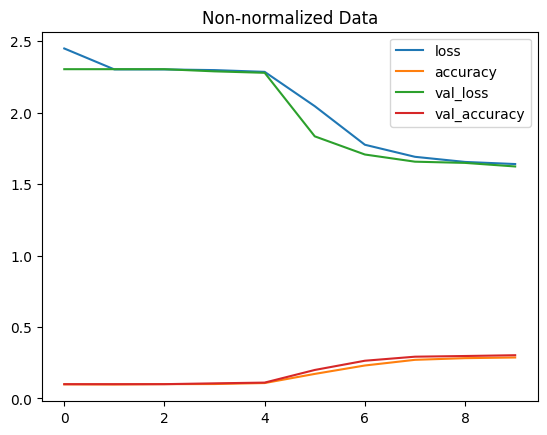

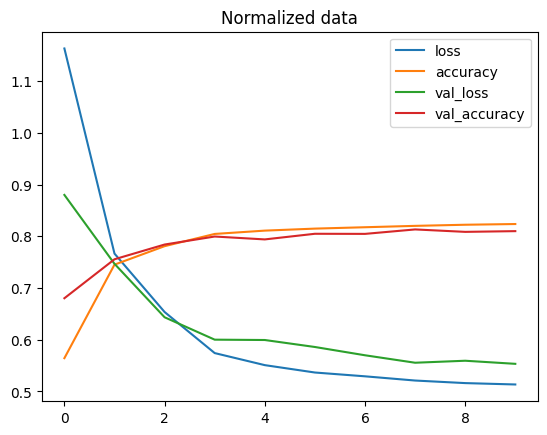

In [67]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [68]:
# set random
tf.random.set_seed(42)

# create the model with callbacks
model_10 = tf.keras.Sequential()
model_10.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_10.add(tf.keras.layers.Dense(4, activation='relu'))
model_10.add(tf.keras.layers.Dense(4, activation='relu'))
model_10.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# lr_rate
lr_rate = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_rate_history = model_10.fit(train_data,
                                    train_label,
                                    epochs=40,
                                    validation_data=(test_data, test_label),
                                    callbacks=[lr_rate])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4476 - accuracy: 0.4521 - val_loss: 1.1065 - val_accuracy: 0.5862 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9856 - accuracy: 0.6198 - val_loss: 0.8893 - val_accuracy: 0.6859 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7515 - accuracy: 0.7355 - val_loss: 0.7269 - val_accuracy: 0.7220 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6619 - accuracy: 0.7438 - val_loss: 0.6949 - val_accuracy: 0.7318 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6226 - accuracy: 0.7773 - val_loss: 0.6330 - val_accuracy: 0.7795 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5978 - accuracy: 0.7923 - val_loss: 0.6342 - val_accuracy: 0.7790 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

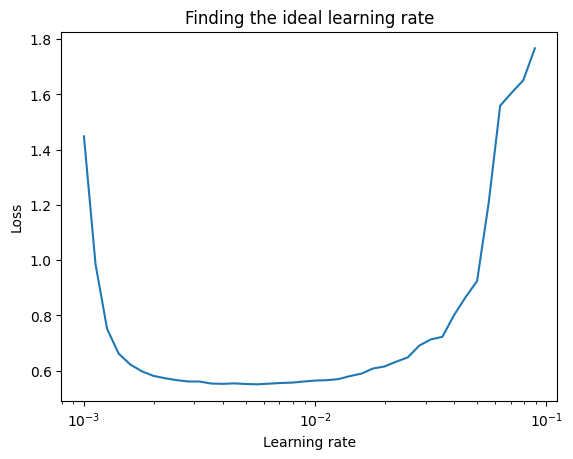

In [69]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_rate_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [99]:
# set random
tf.random.set_seed(42)

# create the model with callbacks
model_11 = tf.keras.Sequential()
model_11.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_11.add(tf.keras.layers.Dense(4, activation='relu'))
model_11.add(tf.keras.layers.Dense(4, activation='relu'))
model_11.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# fit the model
model_11_history = model_11.fit(train_data,
                                    train_label,
                                    epochs=20,
                                    validation_data=(test_data, test_label))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1813 - accuracy: 0.5664 - val_loss: 0.8212 - val_accuracy: 0.6962
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7299 - accuracy: 0.7314 - val_loss: 0.7151 - val_accuracy: 0.7356
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6681 - accuracy: 0.7500 - val_loss: 0.6834 - val_accuracy: 0.7506
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6362 - accuracy: 0.7657 - val_loss: 0.6604 - val_accuracy: 0.7685
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6137 - accuracy: 0.7760 - val_loss: 0.6371 - val_accuracy: 0.7739
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5974 - accuracy: 0.7807 - val_loss: 0.6332 - val_accuracy: 0.7757
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5856 - accuracy: 0.7848 - val_loss: 0.6210 - val_accuracy:

In [71]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [100]:
y_probs = model_11.predict(test_data)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.3348514e-13, 5.7476565e-11, 7.5833732e-12, 1.4839012e-06,
        5.7801408e-08, 9.0622671e-02, 3.7714938e-13, 2.1162432e-01,
        9.5899560e-04, 6.9679248e-01],
       [1.3822001e-02, 1.4140307e-03, 5.9559411e-01, 4.2918064e-03,
        8.0866501e-02, 2.5345406e-03, 2.9792029e-01, 1.1150293e-03,
        2.3377722e-03, 1.0392150e-04],
       [8.5992546e-08, 9.9935132e-01, 4.4020064e-05, 6.0050888e-04,
        3.9986512e-06, 1.2905939e-10, 1.7800517e-08, 1.5480594e-18,
        9.7929165e-12, 1.3922637e-10],
       [4.0972850e-12, 9.9998754e-01, 1.5416017e-08, 1.2450273e-05,
        1.7979774e-09, 3.6257941e-08, 5.3795222e-14, 1.3454992e-19,
        2.7135043e-14, 1.9896700e-10],
       [1.9747579e-01, 2.2673949e-03, 1.3215685e-01, 4.2709775e-02,
        2.5647322e-02, 4.0166182e-05, 5.9436774e-01, 1.6815566e-06,
        5.3330553e-03, 2.5385793e-07]], dtype=float32)

In [73]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(7, 'Sneaker')

In [101]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [102]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_label,
                 y_pred=y_preds)

array([[784,   0,  12,  77,   5,   0, 109,   0,  13,   0],
       [  1, 935,  12,  42,   4,   1,   4,   0,   1,   0],
       [ 18,   4, 686,  12, 145,   0, 133,   0,   2,   0],
       [ 60,  12,   9, 800,  45,   1,  65,   0,   8,   0],
       [  0,   1, 112,  23, 705,   0, 147,   0,  12,   0],
       [  1,   1,   0,   1,   1, 876,   1,  80,   4,  35],
       [172,   0, 114,  53, 107,   0, 528,   0,  26,   0],
       [  0,   0,   0,   0,   0,  47,   0, 911,   1,  41],
       [  0,   0,   2,   9,   8,   5,  53,  10, 911,   2],
       [  0,   0,   0,   0,   3,  16,   1,  51,   8, 921]])

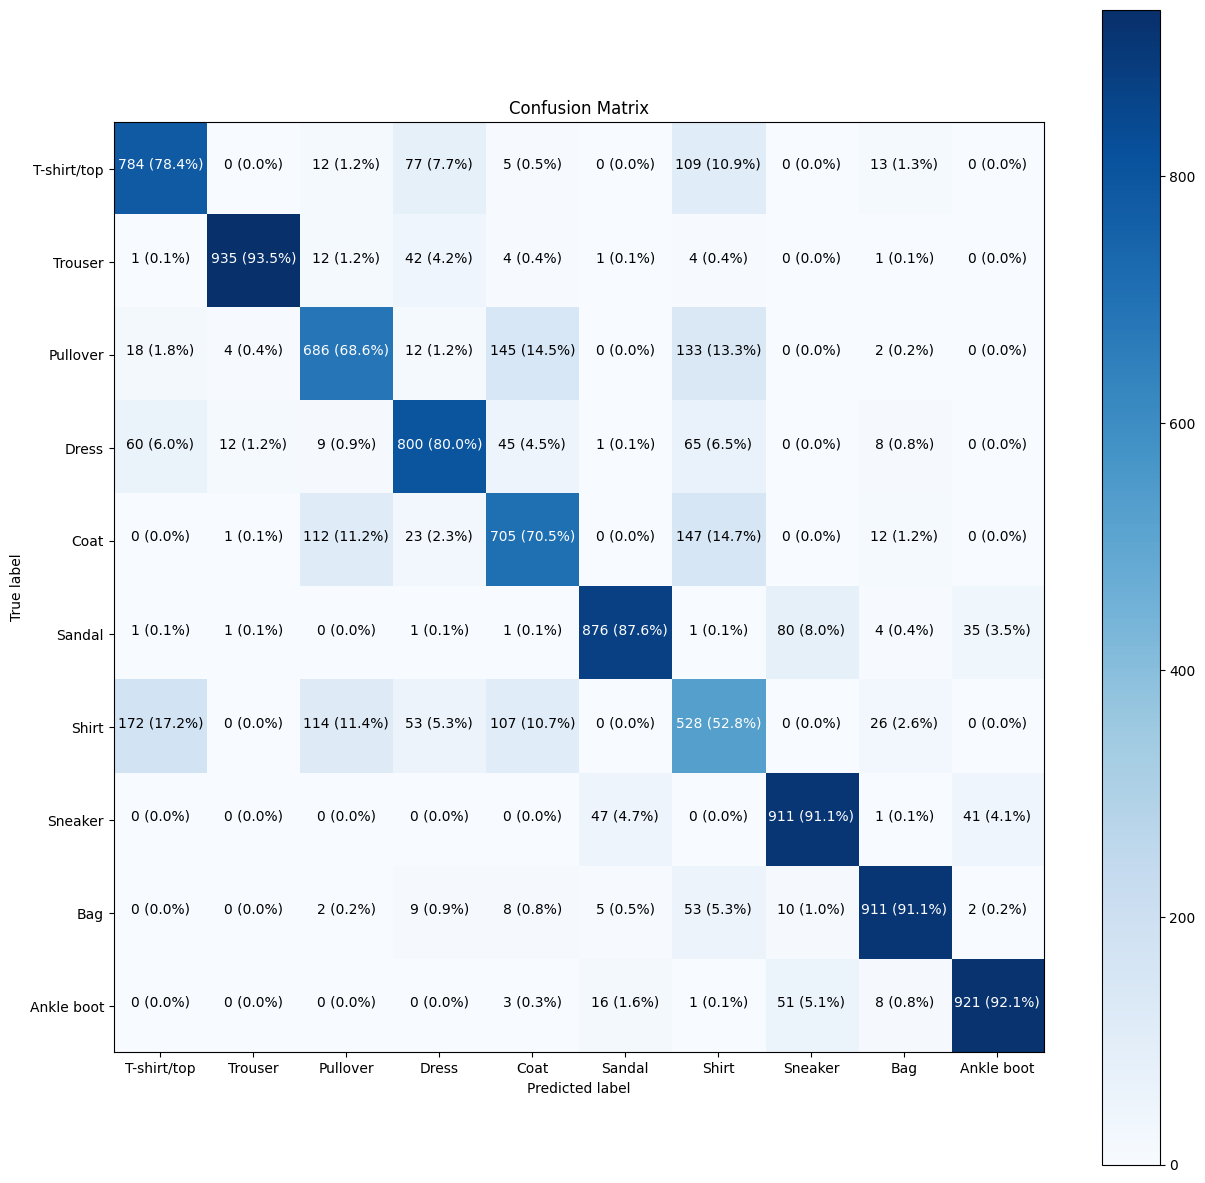

In [103]:
make_confusion_matrix(y_true=test_label,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [104]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 54ms/step


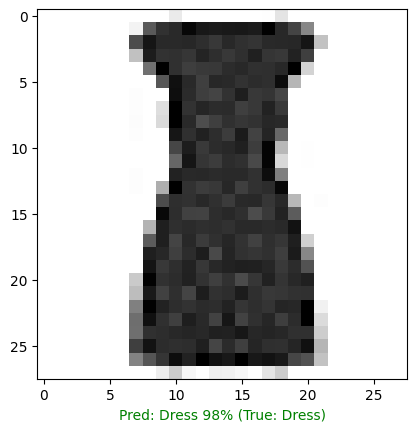

In [106]:
plot_random_image(model=model_11,
                  images=test_data,
                  true_labels=test_label,
                  classes=class_names)
